In [60]:
%matplotlib inline
import pysam
import pandas as pd
import numpy as np
import matplotlib
import sys
import os
#matplotlib.use('Agg')
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [16, 9]
sns.set_context("poster")

In [71]:
df = pd.read_pickle("../methyl_calls/results/calls.csv.pkl")
df["dist"] = df.tpl.diff(); mask = df.refName != df.refName.shift(1); df.loc[mask,"dist"] = np.nan
df.head()

,refName,tpl,strand,base,score,tMean,tErr,modelPrediction,ipdRatio,coverage,frac,fracLow,fracUp,dist
384,m64018_191124_142054/3/ccs,193,0,A,66,6.263,0.883,0.986,6.350,43,1.000,0.900,1.000,NaN
656,m64018_191124_142054/3/ccs,329,0,A,104,7.981,0.754,1.256,6.355,41,1.000,1.000,1.000,136.0
664,m64018_191124_142054/3/ccs,333,0,A,85,4.931,0.540,0.952,5.178,42,1.000,0.879,1.000,4.0
669,m64018_191124_142054/3/ccs,335,1,A,28,3.958,0.469,2.218,1.785,42,0.473,0.130,0.777,2.0
704,m64018_191124_142054/3/ccs,353,0,A,62,3.686,0.472,0.969,3.805,42,0.970,0.706,1.000,18.0


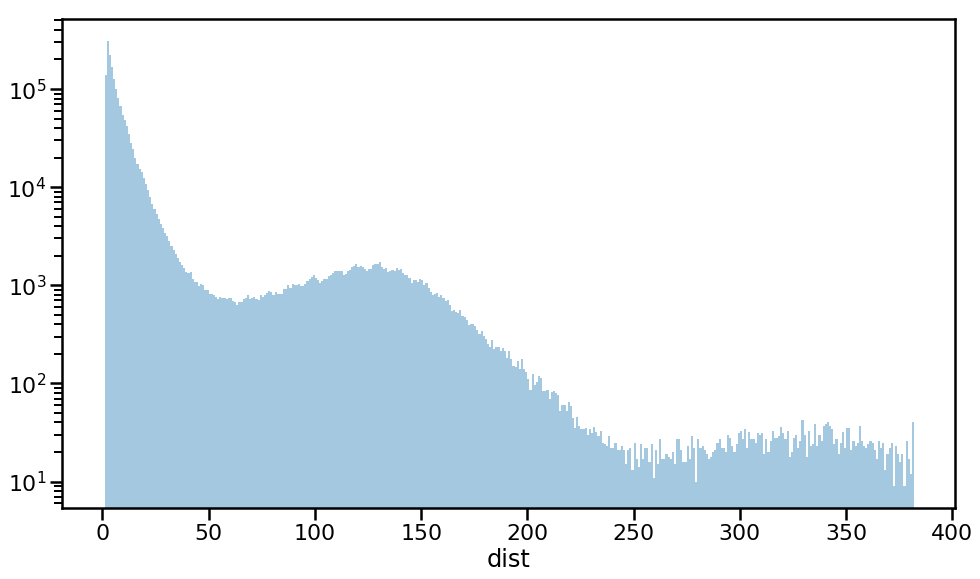

In [94]:
x = df["dist"].dropna()
keep = x[x.between(-1, x.quantile(.999))]
sns.distplot( keep, kde=False, bins=range(int(keep.max()) +1), hist_kws={'log':True})

#sns.distplot( keep, kde=False, bins=range(50,175))#, hist_kws={'log':True})



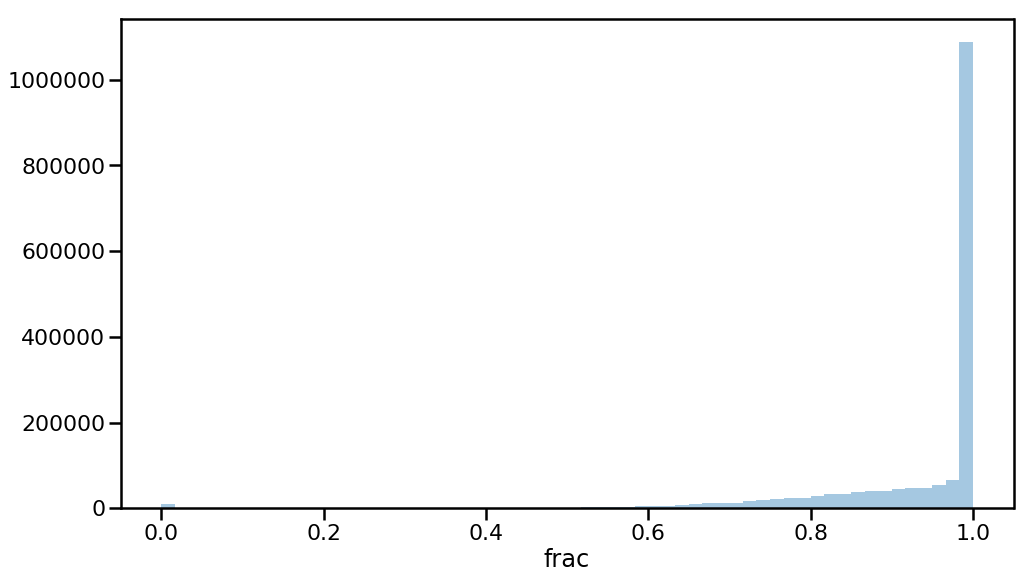

In [66]:
sns.distplot( df.frac, kde=False, bins=60)
#sns.distplot( df.fracLow, kde=False, bins=60)
#sns.distplot( df.fracUp, kde=False, bins=60)
